In [1]:
#!pip install pydot
#!pip install graphviz

In [19]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns
from IPython.display import Image  
from six import StringIO  
import pydot

In [3]:
seed = 42
np.random.seed(seed)

In [4]:
# Define the number of examples.
N = 1000

# Create the dataset.
x, y = make_circles(n_samples=N, random_state=seed, noise=0.1, factor=0.2)

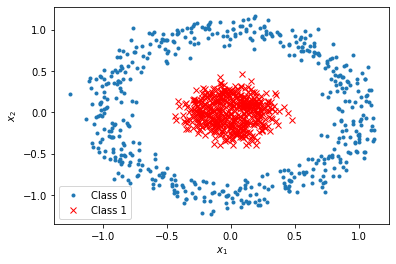

In [5]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
#plt.savefig('distribution_of_classes', dpi=600)
plt.show()

In [6]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

### Logistic Regression

+ Aqui usamos a equação do hiperplano como formato para a função discriminante.
+ Poderíamos usar um polinômio, mas precisaríamos encontrar a ordem ideal.

In [7]:
# Instantiate LogisticRegression object.
clf = LogisticRegression(solver='lbfgs', random_state=seed)

# Train model.
clf.fit(x_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred = clf.predict(x_test)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y_test, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.25


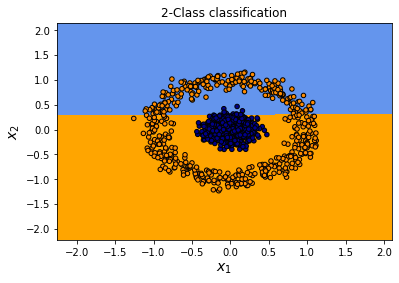

In [8]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")

#plt.savefig('decision_boundary_lr.png', dpi=600)
plt.show()

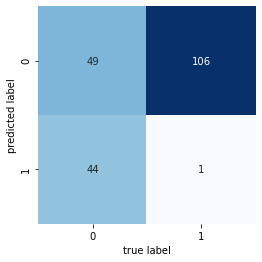

In [9]:
# Plot the confusion matrix.
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('confusion_matrix_lr.png', dpi=600)
plt.show()

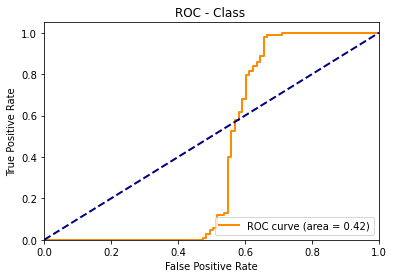

In [10]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

#plt.savefig('roc_dt.png', dpi=600)
plt.show()

In [11]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.53      0.40        93
           1       0.02      0.01      0.01       107

    accuracy                           0.25       200
   macro avg       0.17      0.27      0.20       200
weighted avg       0.16      0.25      0.19       200



### Decision Tree

+ Observem que não precisamos encontrar um polinômio ideal.
+ SciKit-Learn usa o algoritmo CART (Classification and Regression Trees) para inferir árvores.
+ Na versão atual, a a bilioteca não suporta atributos categóricos, apenas numéricos.
+ Documentação: [Decision Trees](https://scikit-learn.org/stable/modules/tree.html#decision-trees)

In [12]:
# Create classifier.
# Parameter "criterion" can assume either 'gini' or 'entropy' values.
clf = DecisionTreeClassifier(criterion='entropy', random_state=seed)

# Fit the classifier on the training features and labels.
clf.fit(x_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred = clf.predict(x_test)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y_test, y_pred)

print('accuracy: ',accuracy)

accuracy:  1.0


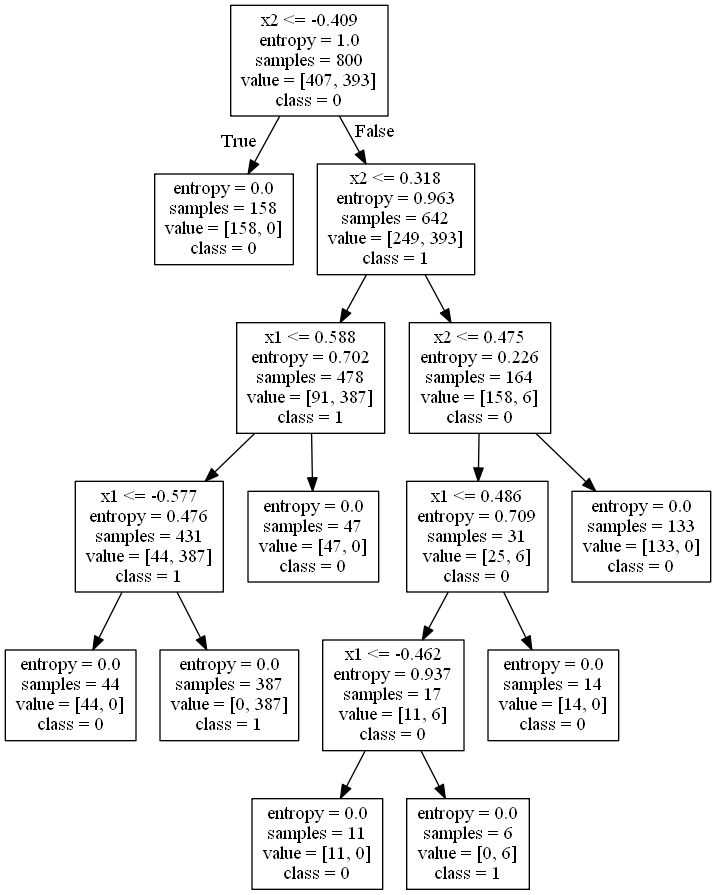

In [13]:
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, class_names=['0','1'], feature_names=['x1','x2'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

#### Definição de alguns dados mostrados na árvore.

+ **samples**: número de amostras daquele nó.
+ **value**: indica o número de amostras por classe que se tem naquela etapa de decisão antes da decisão.

**Referências**

[1] https://stackoverflow.com/questions/65717850/what-is-the-meaning-of-value-in-a-node-in-sklearn-decisiontree-plot-tree

[2] https://stackoverflow.com/questions/23557545/how-to-explain-the-decision-tree-from-scikit-learn

[3] https://stackoverflow.com/questions/47503575/what-do-the-values-that-graphviz-renders-inside-each-node-of-a-decision-tree-m

[4] https://sebastianraschka.com/faq/docs/decisiontree-error-vs-entropy.html

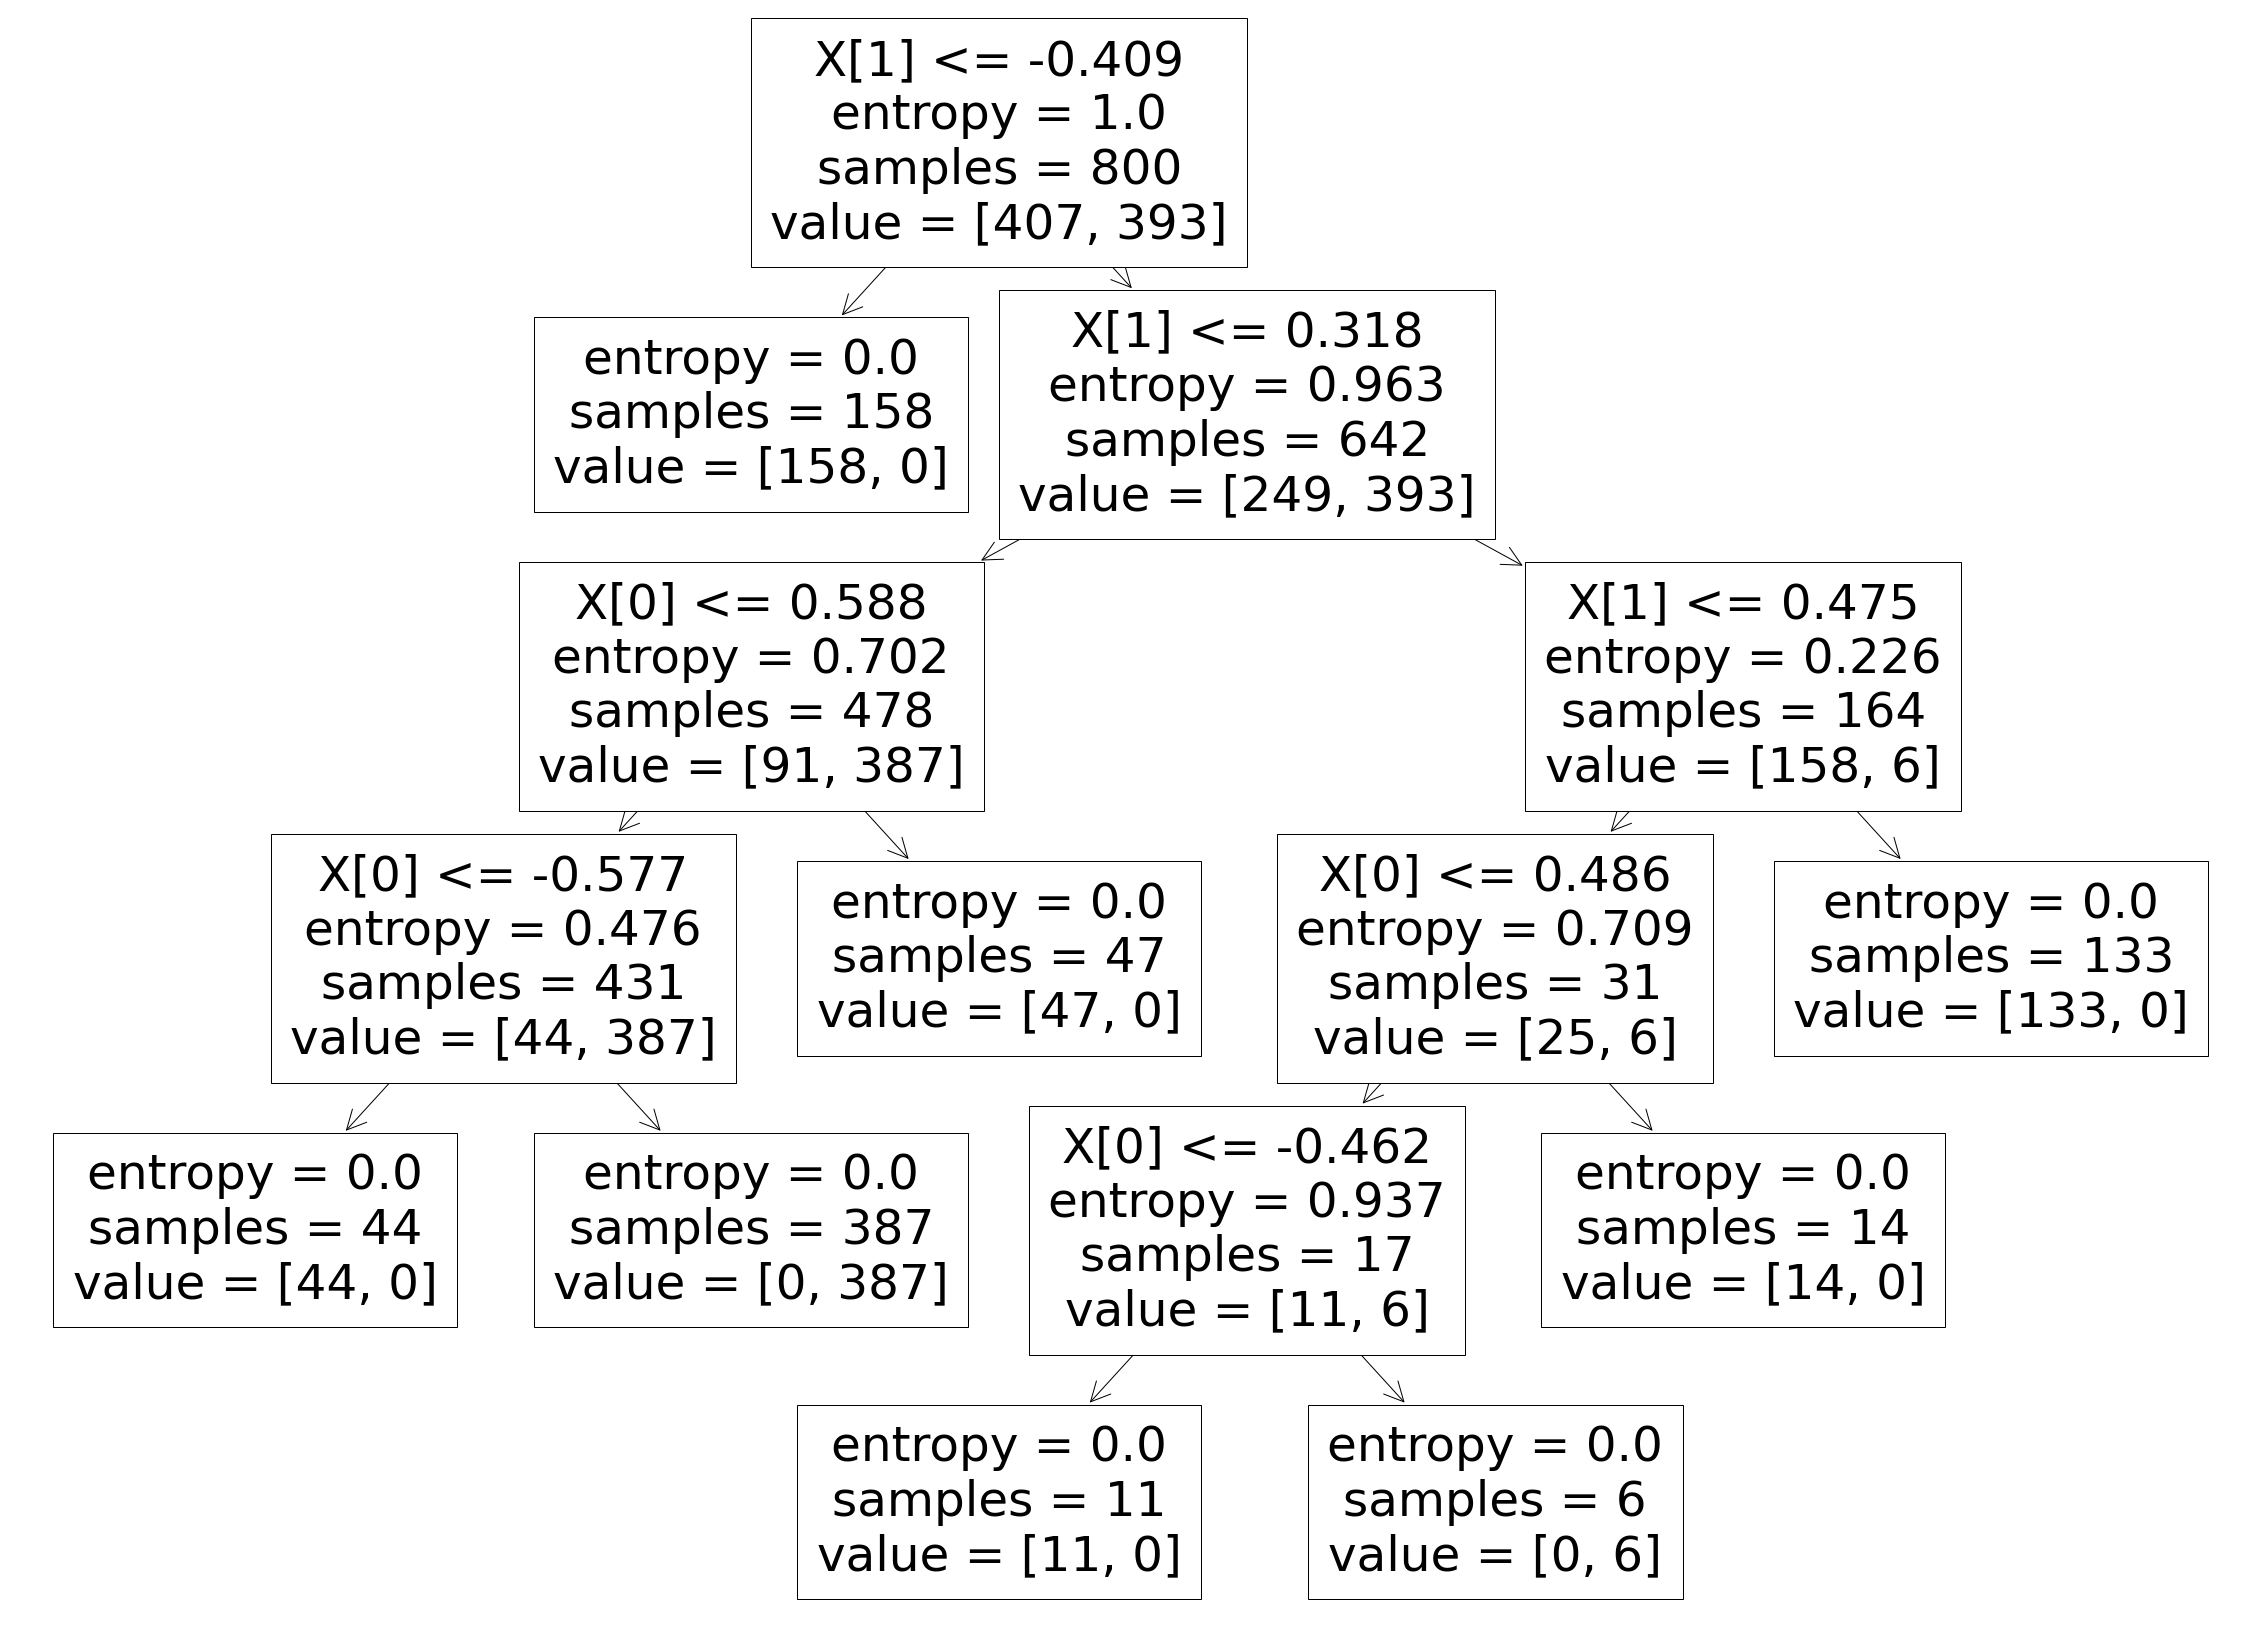

In [28]:
plt.figure(figsize=(40,30))
tree.plot_tree(clf)
plt.show()

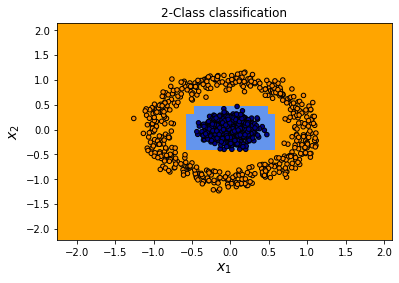

In [18]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")

#plt.savefig('decision_boundary_dt.png', dpi=600)
plt.show()

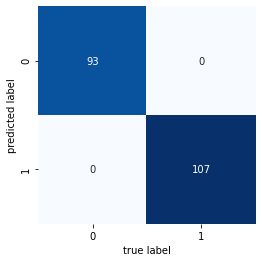

In [15]:
# Plot the confusion matrix.
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig('confusion_matrix_dt.png', dpi=600)
plt.show()

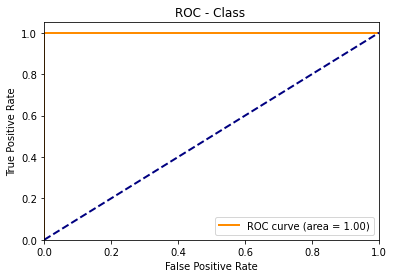

In [16]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

#plt.savefig('roc_dt.png', dpi=600)
plt.show()

In [17]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00       107

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

